In [1]:
!gdown 1DuEccgmPMG6LJssKAeVArR2DKSQrq6hY



Downloading...
From (original): https://drive.google.com/uc?id=1DuEccgmPMG6LJssKAeVArR2DKSQrq6hY
From (redirected): https://drive.google.com/uc?id=1DuEccgmPMG6LJssKAeVArR2DKSQrq6hY&confirm=t&uuid=96aa6664-3927-4656-b67d-3c57b5530ce2
To: /content/PASMP.zip
100% 57.9M/57.9M [00:01<00:00, 36.3MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("PASMP.zip")
zip_ref.extractall()
zip_ref.close()3

In [ ]:
# Import helper functionsu ntuk membagi dataset ke Train/Test/Validation
def split_dir_to_train_test_val(directory = "train/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
# Split images dir to train, test and validation, membagi dataset yang berada dalam satu folder menjadi 3 bagian
split_dir_to_train_test_val(directory="train/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder Quartz Rutilated. Train data copied. 26 files
Folder Quartz Rutilated. Test data copied. 8 files
Folder Quartz Rutilated. Validation data copied. 4 files
Folder Jade. Train data copied. 19 files
Folder Jade. Test data copied. 6 files
Folder Jade. Validation data copied. 3 files
Folder Morganite. Train data copied. 21 files
Folder Morganite. Test data copied. 6 files
Folder Morganite. Validation data copied. 4 files
Folder Lapis Lazuli. Train data copied. 21 files
Folder Lapis Lazuli. Test data copied. 6 files
Folder Lapis Lazuli. Validation data copied. 4 files
Folder Topaz. Train data copied. 23 files
Folder Topaz. Test data copied. 7 files
Folder Topaz. Validation data copied. 4 files
Folder Aquamarine. Train data copied. 25 files
Folder Aquamarine. Test data copied. 7 files
Folder Aquamarine. Validation data copied. 4 files
Folder Hiddenite. Train data copied. 20 files
Folder Hiddenite. Test data copied. 6 files
Folder Hiddenite. Validation data copied. 3 files
Folder Sapphir

In [ ]:
# Using helper function get class names, mengambil nama class
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst',
       'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine',
       'Aventurine Green', 'Aventurine Yellow', 'Benitoite',
       'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate',
       'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue',
       'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase',
       'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore',
       'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite',
       'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper',
       'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar',
       'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green',
       'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite',
       'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose',
       'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite',
       'Rhodonite', 'Ruby', 'Sapphire Blue', 'S

In [ ]:
len(class_names)

87

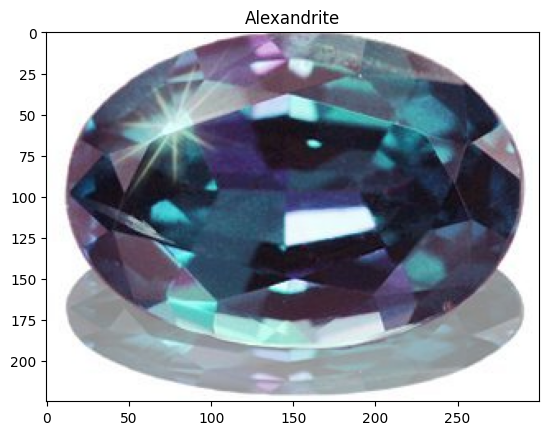

In [ ]:
# Let's visualize some images menampilkan gambar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "Alexandrite")

In [ ]:
# Import library mempersiapkan data gambar agar bisa digunakan dalam pelatihan dan pengujian model deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 1963 images belonging to 87 classes.
Found 556 images belonging to 87 classes.
Found 337 images belonging to 87 classes.


In [ ]:
# Set random seed membangun model cnn
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    # Change the number of units in the Dense layer to match the number of classes
    Dense(len(class_names), activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fit the model	membangun model CNN (Convolutional Neural Network) menggunakan Keras untuk klasifikasi gambar
history = model.fit(train_data,
                    batch_size=32,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.0826 - loss: 4.1852 - val_accuracy: 0.3205 - val_loss: 2.5894
Epoch 2/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5504 - loss: 1.7211 - val_accuracy: 0.4481 - val_loss: 2.0028
Epoch 3/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8501 - loss: 0.6487 - val_accuracy: 0.4748 - val_loss: 2.0176


In [ ]:
model.evaluate(test_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.4902 - loss: 2.0330


[2.070436954498291, 0.47122302651405334]

<Axes: >

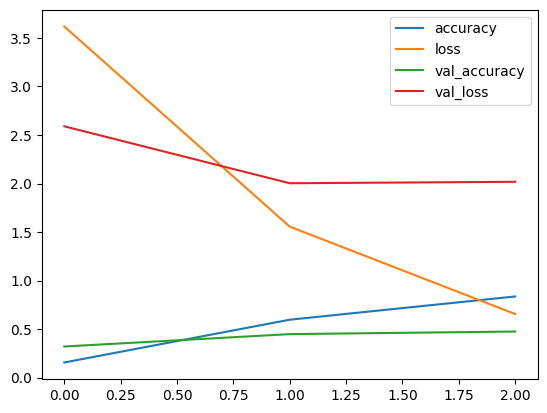

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
# Download image
!wget https://the-crystal-council.sfo2.digitaloceanspaces.com/wp-content/uploads/2019/08/amazonite-tumbled-1-1000px.jpg
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("amazonite-tumbled-1-1000px.jpg", 240)

--2025-05-21 14:28:44--  https://the-crystal-council.sfo2.digitaloceanspaces.com/wp-content/uploads/2019/08/amazonite-tumbled-1-1000px.jpg
Resolving the-crystal-council.sfo2.digitaloceanspaces.com (the-crystal-council.sfo2.digitaloceanspaces.com)... 138.68.32.225
Connecting to the-crystal-council.sfo2.digitaloceanspaces.com (the-crystal-council.sfo2.digitaloceanspaces.com)|138.68.32.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208992 (204K) [image/jpeg]
Saving to: ‘amazonite-tumbled-1-1000px.jpg’

amazonite-tumbled-1 100%[===================>] 204.09K  --.-KB/s    in 0.1s    

2025-05-21 14:28:44 (1.65 MB/s) - ‘amazonite-tumbled-1-1000px.jpg’ saved [208992/208992]



In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[5.01941936e-03, 4.36469527e-05, 1.97438290e-04, 5.28960882e-05,
        2.88832553e-07, 7.17177609e-05, 1.76398933e-03, 6.86620071e-04,
        1.80350093e-03, 1.01935037e-03, 1.23281711e-06, 1.79730181e-04,
        4.81444586e-04, 1.06945642e-07, 5.97920232e-02, 1.29737324e-04,
        2.06953676e-09, 1.92052089e-02, 3.49755453e-07, 8.42164227e-10,
        3.93813383e-03, 2.06108554e-03, 4.11391407e-01, 5.86374381e-06,
        1.45147878e-05, 1.08718154e-06, 1.33074820e-01, 1.49854657e-03,
        8.45862902e-04, 1.08956156e-04, 1.32899741e-02, 6.23550685e-03,
        7.92764404e-05, 4.20228112e-03, 2.01365445e-04, 1.94403892e-05,
        4.48405091e-03, 2.81225198e-07, 1.38977208e-04, 4.59668692e-03,
        1.16858784e-04, 1.87354825e-08, 4.71541565e-03, 5.64965177e-08,
        7.29491003e-04, 3.75821651e-03, 3.03037523e-04, 5.79891761e-08,
        1.51099578e-01, 1.05149038e-05, 8.73130457e-10, 4.88014817e-02,
        5.65752445e-04, 7.86358069e-05, 6.97349208e-07, 7.594826

In [ ]:
class_names[pred[0].argmax()]

np.str_('Chrysocolla')